##Mall Customers Dataset


There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the Spending score of all customers. We have to segment these customers based on the details given. So we will be making clusters of cutomers using two techniques -

K-Means Clustering

Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [ ]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Finding the number of males and females in the data
data.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

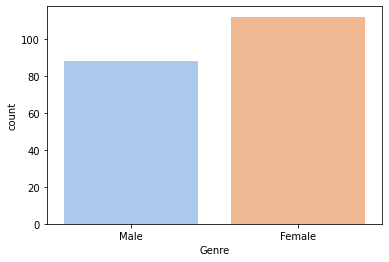

In [ ]:
# Visualising the number of males and females in the data
sns.countplot(x="Genre",data=data,palette="pastel")
plt.show()


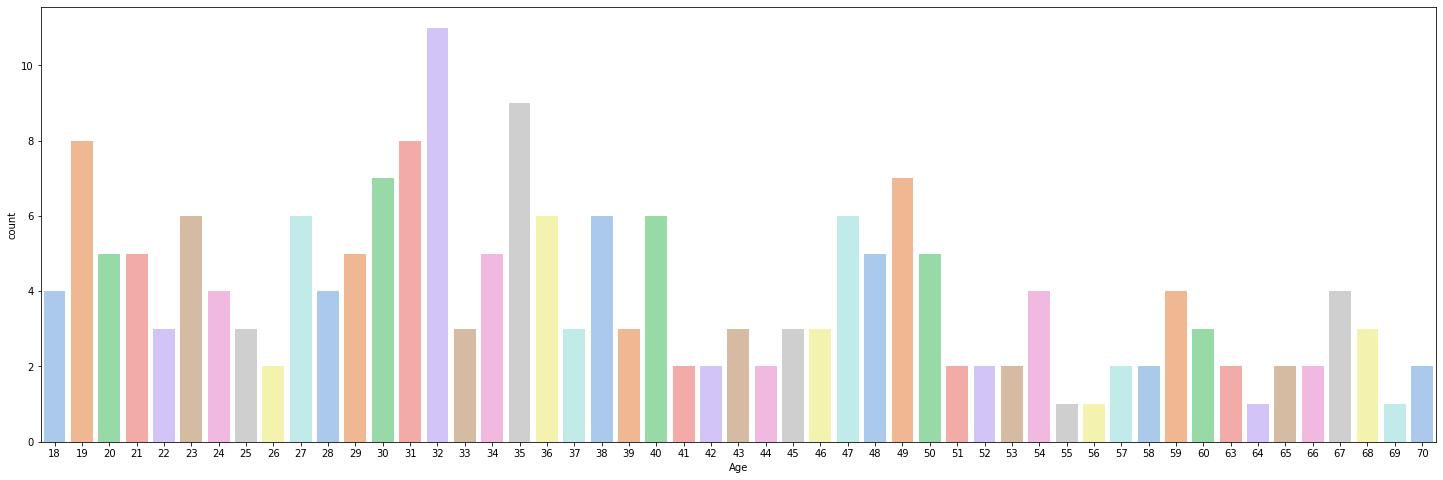

In [ ]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=data,palette="pastel")
plt.show()

Customers with age 32 make for the largest number of customers.

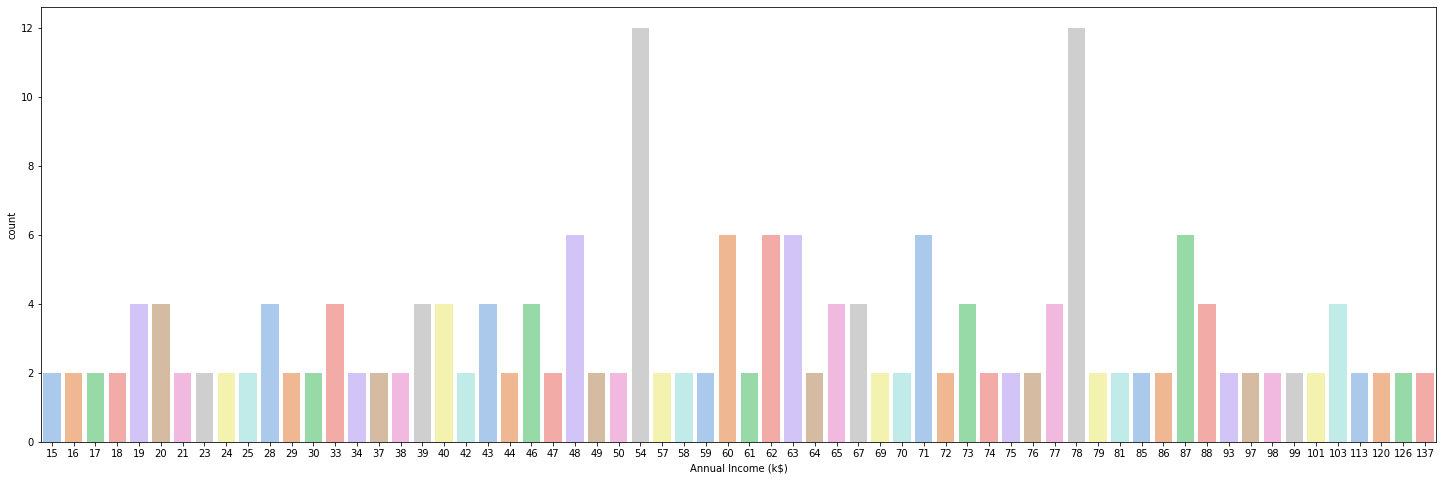

In [ ]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=data,palette="pastel")
plt.show()

Customers with annual income of 54k and 78k make for the largest number of customers.

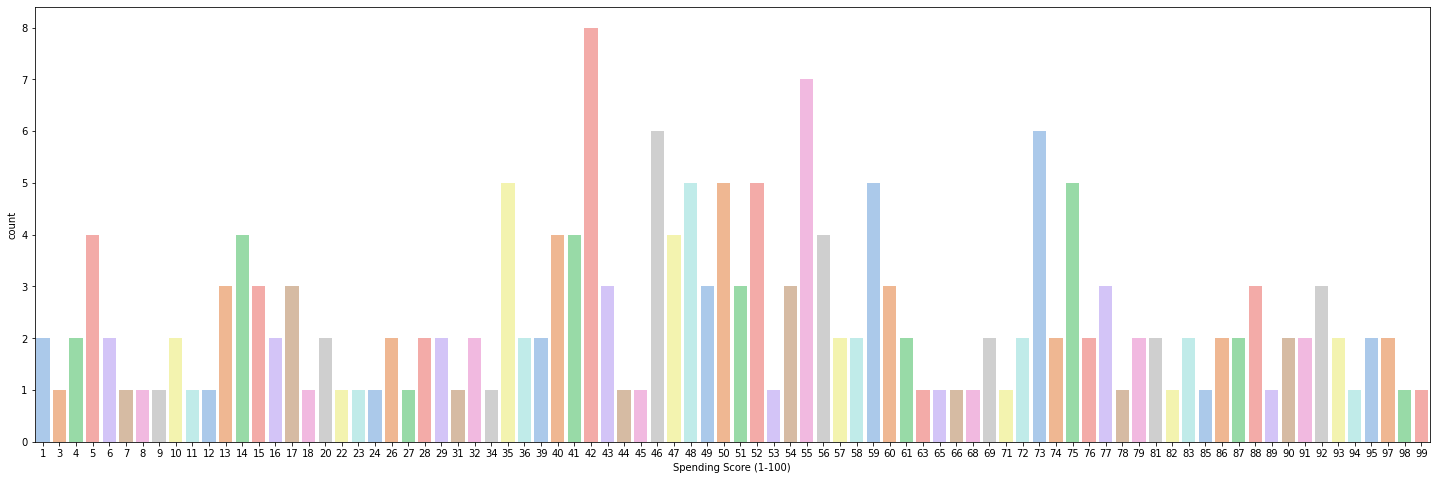

In [ ]:
# Visualising the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=data,palette="pastel")
plt.show()

The maximum spending score is 42.

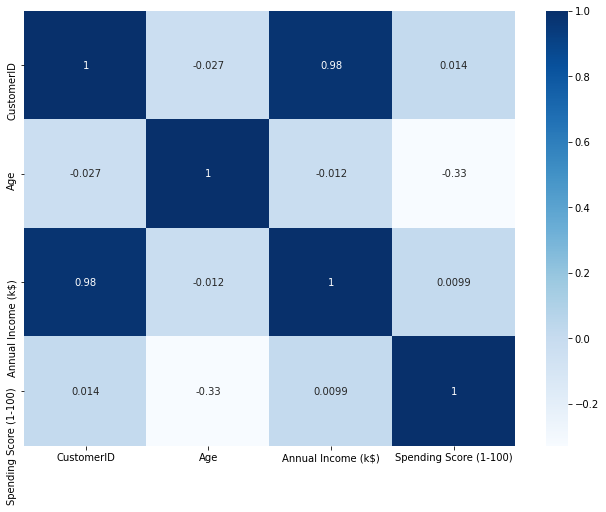

In [ ]:
# Finding correaltion between all the parameters in the dataset.
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(data.corr(),annot=True,cmap="Blues" ,ax=ax)
plt.show()

#K-Means Clustering

Making clusters based on Annual income and Spending Score.

In [ ]:
data_copy = data

In [ ]:
real_x = data_copy.iloc[:,[3,4]]

In [ ]:
real_x

In [ ]:
wcss=[]
for i in range (1,16):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(real_x)
    wcss.append(kmeans.inertia_)

In [ ]:
print(wcss)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37239.83554245604, 30273.394312070042, 25018.576334776335, 21850.165282585633, 19664.685196005543, 17602.19046838677, 16115.215606639838, 14600.44364738564, 13450.08023381847, 12038.745689262341]


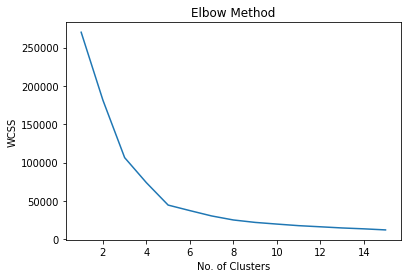

In [ ]:
# Visualising elbow method
plt.plot(range(1,16),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

So the optimal number of clusters = 5

###Applying K-Means :

In [ ]:
# creating object kmeans of class KMeans()
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)

In [ ]:
pred = kmeans.fit_predict(real_x)
print(pred)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [ ]:
pred.astype

<function ndarray.astype>

In [ ]:
# converting x into ndarray to avoid errors
real_x=np.array(real_x)

In [ ]:
real_x.astype

<function ndarray.astype>

In [ ]:
new = kmeans.fit_predict(np.array([[15,39]]))
print(new)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


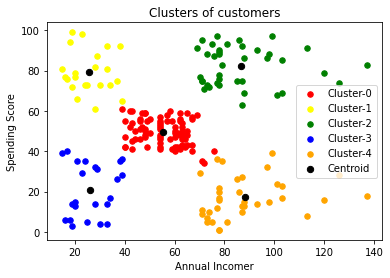

In [ ]:
plt.scatter(real_x[pred == 0,0], real_x[pred == 0,1], s = 30 , c = 'red')
plt.scatter(real_x[pred == 1,0], real_x[pred == 1,1], s = 30 , c = 'yellow')
plt.scatter(real_x[pred == 2,0], real_x[pred == 2,1], s = 30 , c = 'green')
plt.scatter(real_x[pred == 3,0], real_x[pred == 3,1], s = 30 , c = 'blue')
plt.scatter(real_x[pred == 4,0], real_x[pred == 4,1], s = 30 , c = 'orange')

#Centroid

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40 ,c = "black")

plt.title("Clusters of customers")
plt.xlabel("Annual Incomer")
plt.ylabel("Spending Score")
plt.legend(["Cluster-0","Cluster-1","Cluster-2","Cluster-3","Cluster-4","Centroid"])
plt.show()



Cluster 0 contains customers with average annual income and average spending score.


Cluster 1 contains customers with low annual income but high spending score.

Cluster 2 contains customers with high annual income and high spending score.

Cluster 3 contains customers with low annual income and low spending score.

Cluster 4 contains customers with high annual income but low spending score.

#Hierarchial Clustering

Dendrogram : It is a plot between Euclidean distance (y-axis) and data points (x-axis)

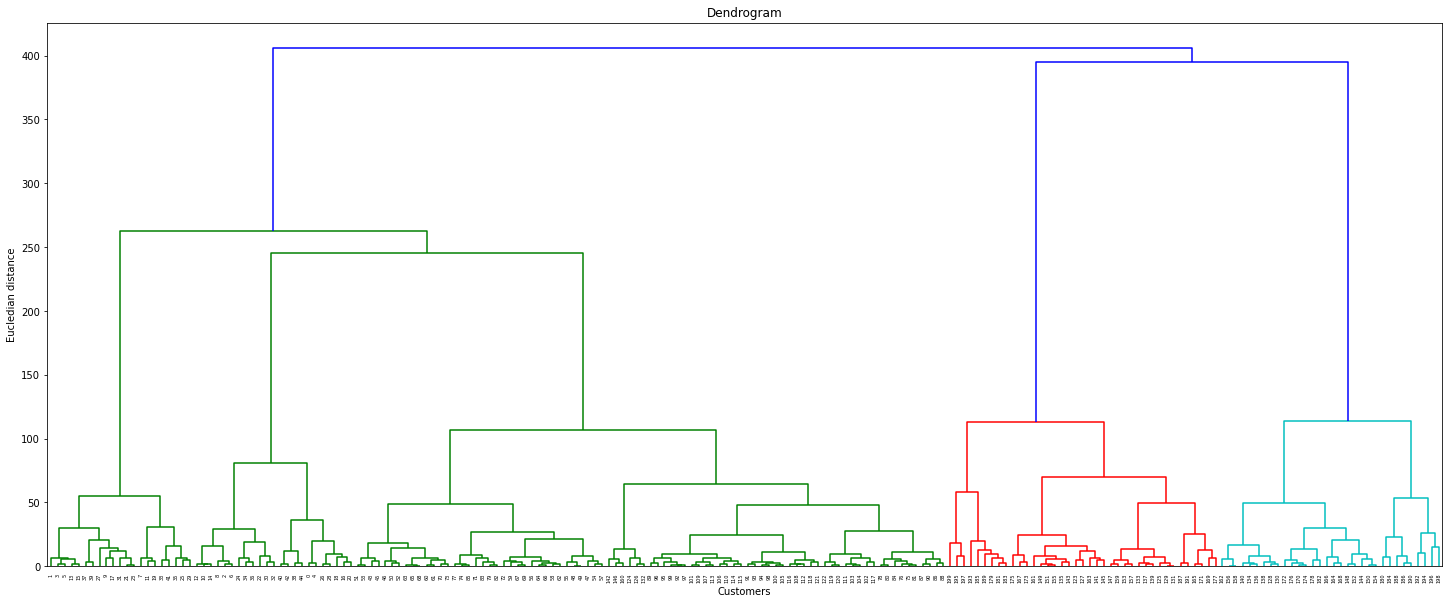

In [ ]:
# Visualising the dendrogram
fig = plt.figure(figsize=(25, 10))
dendrogram=sch.dendrogram(sch.linkage(real_x,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distance")
plt.show()

So the optimal number of custers = 5

Applying Agglomerative Hierarchical Clustering :

In [ ]:
# creating object hc of class AgglomerativeClustering()
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")

In [ ]:
# it gives an array which tells as to which data point belongs to which cluster (0,1,2,3,4)
y_hc=hc.fit_predict(real_x)

In [ ]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
y_hc.astype

<function ndarray.astype>

In [ ]:
# converting x into ndarray to avoid errors
real_x=np.array(real_x)

In [ ]:
real_x.astype

<function ndarray.astype>

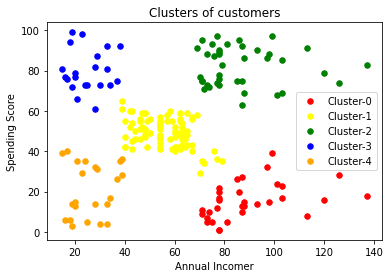

In [ ]:
plt.scatter(real_x[y_hc == 0,0], real_x[y_hc == 0,1], s = 30 , c = 'red')
plt.scatter(real_x[y_hc == 1,0], real_x[y_hc == 1,1], s = 30 , c = 'yellow')
plt.scatter(real_x[y_hc == 2,0], real_x[y_hc == 2,1], s = 30 , c = 'green')
plt.scatter(real_x[y_hc == 3,0], real_x[y_hc == 3,1], s = 30 , c = 'blue')
plt.scatter(real_x[y_hc == 4,0], real_x[y_hc == 4,1], s = 30 , c = 'orange')

plt.title("Clusters of customers")
plt.xlabel("Annual Incomer")
plt.ylabel("Spending Score")
plt.legend(["Cluster-0","Cluster-1","Cluster-2","Cluster-3","Cluster-4"])
plt.show()